In [1]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

In [2]:
df =  pd.read_csv('csv/eruptions_2020.csv')
df.head()

,Volcano Number,Volcano Name,Eruption Number,Eruption Category,Area of Activity,VEI,VEI Modifier,Start Year Modifier,Start Year,Start Year Uncertainty,...,Evidence Method (dating),End Year Modifier,End Year,End Year Uncertainty,End Month,End Day Modifier,End Day,End Day Uncertainty,Latitude,Longitude
0,233020,"Fournaise, Piton de la",22343,Confirmed Eruption,NaN,NaN,NaN,NaN,2020.0,NaN,...,Historical Observations,NaN,2020.0,NaN,2.0,NaN,16.0,NaN,-21.244,55.708
1,345020,Rincon de la Vieja,22346,Confirmed Eruption,NaN,NaN,NaN,NaN,2020.0,NaN,...,Historical Observations,NaN,2020.0,NaN,1.0,NaN,31.0,NaN,10.830,-85.324
2,353010,Fernandina,22347,Confirmed Eruption,NaN,NaN,NaN,NaN,2020.0,NaN,...,Historical Observations,NaN,2020.0,NaN,1.0,NaN,12.0,NaN,-0.370,-91.550
3,273070,Taal,22344,Confirmed Eruption,NaN,NaN,NaN,NaN,2020.0,NaN,...,Historical Observations,NaN,2020.0,NaN,1.0,NaN,22.0,NaN,14.002,120.993
4,282050,Kuchinoerabujima,22345,Confirmed Eruption,NaN,NaN,NaN,NaN,2020.0,NaN,...,Historical Observations,>,2020.0,NaN,2.0,NaN,13.0,NaN,30.443,130.217


In [3]:
df.shape[0]

11172

In [4]:
df.columns

Index(['Volcano Number', 'Volcano Name', 'Eruption Number',
       'Eruption Category', 'Area of Activity', 'VEI', 'VEI Modifier',
       'Start Year Modifier', 'Start Year', 'Start Year Uncertainty',
       'Start Month', 'Start Day Modifier', 'Start Day',
       'Start Day Uncertainty', 'Evidence Method (dating)',
       'End Year Modifier', 'End Year', 'End Year Uncertainty', 'End Month',
       'End Day Modifier', 'End Day', 'End Day Uncertainty', 'Latitude',
       'Longitude'],
      dtype='object')

In [5]:
df.isnull().sum()

Volcano Number                  0
Volcano Name                    0
Eruption Number                 0
Eruption Category               0
Area of Activity             6479
VEI                          2905
VEI Modifier                 9861
Start Year Modifier          9560
Start Year                      1
Start Year Uncertainty       9084
Start Month                   189
Start Day Modifier          10757
Start Day                     192
Start Day Uncertainty       10319
Evidence Method (dating)     1280
End Year Modifier           11070
End Year                     6842
End Year Uncertainty        11166
End Month                    6845
End Day Modifier            10454
End Day                      6848
End Day Uncertainty         10479
Latitude                        0
Longitude                       0
dtype: int64

In [6]:
# Let's explore eruptions year distribution over time

min_last_eruption_year= df['Start Year'].min()
max_last_eruption_year= df['Start Year'].max()
print(f'min={min_last_eruption_year}, max={max_last_eruption_year}')

min=-10450.0, max=2020.0


In [7]:
eruption_frequency_bins = [-10450,-4571, 0, 672, 1344, 2020 ]
frequency = df['Start Year'] \
            .value_counts(bins=eruption_frequency_bins) \
            .sort_index(ascending=True)
frequency 

(-10450.001, -4571.0]     818
(-4571.0, 0.0]           1555
(0.0, 672.0]              414
(672.0, 1344.0]           620
(1344.0, 2020.0]         7764
Name: Start Year, dtype: int64

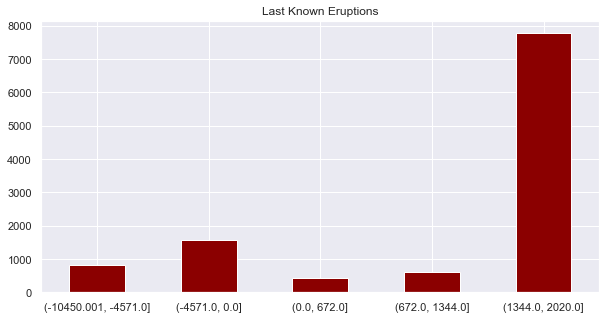

In [8]:
frequency.plot.bar(figsize= (10,5), color='darkred')
plt.title( "Last Known Eruptions")
plt.xticks( rotation='horizontal')
plt.show()

In [9]:
df.to_csv('eruptions_cleaned.csv', index=False, na_rep='NULL')